# MONDRIAN TREE: APPLICATION TO 2D MOONS DATASET

In [1]:
cd  "C:\Users\silvi\Desktop\Fisica\TESI\tesi"

C:\Users\silvi\Desktop\Fisica\TESI\tesi


In [2]:
from sklearn import datasets
import pandas as pd
import pylab as plt

import Mondrian
import Plot

## moons dataset:

In [3]:
moons = datasets.make_moons(n_samples=40,noise=0.05,random_state=0)
X = moons[0] # data
y = moons[1] # true labels

df_moons = {'X1':X[:,0],'X2':X[:,1],'y':y}
df_moons = pd.DataFrame(df_moons)
df_moons.head()

,X1,X2,y
0,0.033882,0.188623,1
1,-0.067786,0.494295,1
2,0.280507,-0.200442,1
3,0.769201,0.572853,0
4,-0.103367,0.970359,0


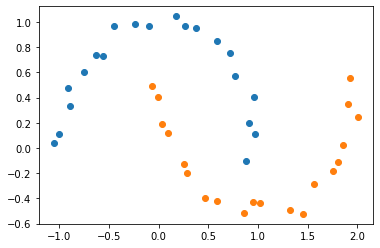

In [4]:
fig,ax = plt.subplots()
ax.scatter(df_moons.query('y==0')['X1'],df_moons.query('y==0')['X2'])
ax.scatter(df_moons.query('y==1')['X1'],df_moons.query('y==1')['X2'])

In [5]:
import Matrix
data,cut_matrix,point_cut_distance = Matrix.cut_ensemble(X)

*data* stores the indexed data. *cut_matrix* stores the indexed cutting hyperplane for each pair of samples. *point_cut_distance* stores the distances between hyperplanes and samples.

In [7]:
data.head()

,0,1,index
0,0.033882,0.188623,0
1,-0.067786,0.494295,1
2,0.280507,-0.200442,2
3,0.769201,0.572853,3
4,-0.103367,0.970359,4


In [8]:
print('number of hyperplanes: ',len(cut_matrix))
cut_matrix#.head()

number of hyperplanes:  780


,index1,index2,cut_index,magnitude_norm_vect,norm_vect_0,norm_vect_1,equivalent_cut_index
0,1,0,0,0.329357,-0.315603,0.948891,0
1,2,0,1,0.089151,0.535389,-0.844605,1
2,2,1,2,-0.083678,0.448165,-0.893951,2
3,3,0,3,0.532212,0.886295,0.463120,3
4,3,1,4,0.399034,0.995624,0.093447,4
...,...,...,...,...,...,...,...
775,39,34,775,0.300261,0.867041,-0.498237,119
776,39,35,776,-0.087271,0.997277,-0.073743,52
777,39,36,777,-0.126221,0.524599,-0.851349,79
778,39,37,778,-1.326210,-0.917226,-0.398368,46


In [9]:
print('number of rows = number of samples = ',len(point_cut_distance))
print('number of columns = number of hyperplanes + 1 = ',len(point_cut_distance.columns))
point_cut_distance.head()

number of rows = number of samples =  40
number of columns = number of hyperplanes + 1 =  781


,cut_index_0,cut_index_1,cut_index_2,cut_index_3,cut_index_4,cut_index_5,cut_index_6,cut_index_7,cut_index_8,cut_index_9,...,cut_index_771,cut_index_772,cut_index_773,cut_index_774,cut_index_775,cut_index_776,cut_index_777,cut_index_778,cut_index_779,point_index
0,-0.161068,-0.230323,-0.069757,-0.414828,-0.347675,-0.260247,-0.396846,-0.551095,-0.169525,0.030443,...,1.122848,-0.520687,-0.025649,-0.483868,-0.364863,0.107151,-0.016588,1.219991,0.103830,0
1,0.161068,-0.542927,-0.388577,-0.363372,-0.420333,-0.056162,-0.078199,-0.238696,0.152608,0.249683,...,1.400112,-0.611150,-0.347678,-0.665043,-0.605310,-0.016781,-0.330157,1.191473,-0.181752,1
2,-0.608084,0.230323,0.388577,-0.376428,-0.138486,-0.457386,-0.822697,-0.957459,-0.616063,-0.355285,...,0.681472,-0.288400,0.418348,-0.140486,0.042818,0.381796,0.444021,1.148771,0.448657,2
3,-0.028545,-0.161164,-0.083696,0.414828,0.420333,0.457386,-0.145559,-0.222739,-0.033511,-0.479423,...,0.819951,0.228144,-0.179258,0.118793,0.081251,0.812134,0.042046,0.392472,-0.392590,3
4,0.624030,-0.964063,-0.830101,-0.174432,-0.411271,0.327266,0.396846,0.238696,0.616063,0.479423,...,1.739282,-0.629362,-0.813492,-0.829106,-0.873353,-0.087371,-0.754119,1.034460,-0.646075,4


## MONDRIAN CLUSTERING TREE

In [4]:
# parameter setting
t0 = 0
lifetime = 5
exp = 5
metric = 'min_corr'  # 'variance','centroid_diff','centroid_ratio','min'

In [5]:
data,part,m,list_p,classified_data = Mondrian.mondrian_tree(X,t0,lifetime,exp,metric)

PARTITIONING:
total number of splits: 26
MERGING:
range of possible number of clusters: 1-13


In [9]:
#namefile = 'example/prova'
#Mondrian.save_tree(namefile,data,part,m,list_p,list_m_leaf)

In [10]:
#data_read,part_read,m_read,list_p_read,list_m_leaf_read = Mondrian.read_tree(namefile)

### OUTCOME OF THE PARTITIONING PHASE:

*part* is a dataframe. Each row corresponds to a polytope that has been created during the hierarchical splitting. Each polytope is associated to its creation time, its characterization number, the characterization number of the father, the boolean information of being a leaf, the polytope object created by the Polytope package.

In [6]:
print('total number of polytopes: ',len(part))
part.head()

total number of polytopes:  53


,time,father,part_number,leaf,polytope
0,0.000000,nan,0,False,Single polytope \n [[ 1. 0.] | [[2.16184]...
1,0.029115,0,1,False,Single polytope \n [[ 1. 0. ] | ...
2,0.029115,0,2,False,Single polytope \n [[-1. 0. ] | ...
3,0.041894,1,3,False,Single polytope \n [[ 1. 0. ] | ...
4,0.041894,1,4,False,Single polytope \n [[ 1. 0. ] | ...


*m* is a list of lists. Each sublist corresponds to a polytope of the *part* dataframe and stores the indexes of the samples contained in it.

In [7]:
print('number of elements of the list: ',len(m))
m

number of elements of the list:  53


[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [11, 12, 14, 16, 18, 24, 26, 30, 37],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  13,
  15,
  17,
  19,
  20,
  21,
  22,
  23,
  25,
  27,
  28,
  29,
  31,
  32,
  33,
  34,
  35,
  36,
  38,
  39],
 [11, 16, 18, 24, 26, 30],
 [12, 14, 37],
 [2, 6, 9, 10, 13, 15, 27, 28, 31, 38, 39],
 [0, 1, 3, 4, 5, 7, 8, 17, 19, 20, 21, 22, 23, 25, 29, 32, 33, 34, 35, 36],
 [11, 16, 24, 26, 30],
 [18],
 [12],
 [14, 37],
 [2, 6, 9, 10, 15, 28],
 [13, 27, 31, 38, 39],
 [0, 3, 19, 21, 25, 32, 33, 36],
 [1, 4, 5, 7, 8, 17, 20, 22, 23, 29, 34, 35],
 [11, 16],
 [24, 26, 30],
 [6, 9, 15],
 [2, 10, 28],
 [13, 27, 31, 39],
 [38],
 [3, 21],
 [0, 19, 25, 32, 33, 36],
 [5, 8, 17, 22, 35],
 [1, 4, 7, 20, 23, 29, 34],
 [24],
 [26, 30],
 [6, 9],
 [15],
 [10],
 [2, 28],
 [

### OUTCOME OF THE MERGING PHASE: 

*list_p* is a list of dataframes. Each dataframe describes a configuration of the space division during the merging procedure. Each row corresponds to a polytope and stores the information about the neighboring polytopes and the subspaces that have been merged in order to obtain that configuration. The number of clusters is equal to the number of polytopes/rows.
The last element of the list describes the initial condition after the connection of the single data subspaces with the nearest ones. The first element describes the final condition, in which all the subspaces are merged and all the samples belongs to the same class.

In [8]:
#last element of the list: the subspaces number 16, 25, 34 and 36 contain single samples and are already merged
list_p[-1]

,part_number,neighbors,merged_part
0,10,"[21, 15, 39]",[9]
1,15,"[10, 39, 26, 27]","[8, 25]"
2,21,"[10, 39, 30, 51]",[52]
3,26,"[15, 27]",[]
4,27,"[26, 15, 30, 39]",[28]
5,30,"[35, 27, 21, 38, 39, 44, 51]","[29, 32, 34, 47]"
6,35,"[30, 44]",[]
7,38,"[44, 45, 49, 30, 51]",[]
8,39,"[21, 15, 10, 30, 27]","[20, 40]"
9,44,"[35, 38, 30, 45]",[]


In [9]:
# first element of the list: all the subspaces are merged
list_p[0]

,part_number,neighbors,merged_part
0,35,[],"[43, 50, 45, 44, 49, 20, 40, 52, 42, 51, 21, 3..."


In [10]:
# fifth element of the list:
list_p[4]

,part_number,neighbors,merged_part
0,26,"[27, 39]","[9, 8, 25, 15, 10]"
1,27,"[26, 30, 39]",[28]
2,30,"[35, 27, 39]","[29, 32, 34, 47, 38]"
3,35,"[30, 39]","[43, 50, 45, 44, 49]"
4,39,"[30, 27, 26, 35]","[20, 40, 52, 42, 51, 21]"


*classified_data* is a list of lists. Each sublist contains the labels to associate to each sample in the configuration described by the corresponding element of *list_p*.

In [12]:
classified_data[4]

[2,
 2,
 2,
 4,
 3,
 3,
 1,
 3,
 3,
 1,
 2,
 0,
 0,
 4,
 0,
 1,
 0,
 3,
 0,
 4,
 3,
 4,
 3,
 3,
 0,
 4,
 0,
 4,
 2,
 3,
 0,
 2,
 4,
 2,
 2,
 3,
 4,
 0,
 4,
 4]

## VISUALIZATION OF THE RESULTS

### PLOT OF THE FINAL SPACE PARTITIONS 

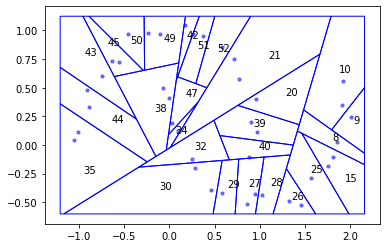

In [13]:
Plot.plot2D_partitioning(data,part)

### PLOT OF THE SPACE CLASSIFICATION FOR 2, 3 AND 6 NUMBER OF CLUSTERS

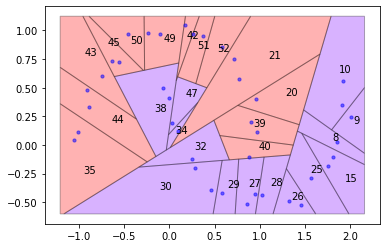

In [14]:
number_of_clusters = 2
Plot.plot2D_merging(data,part,list_p,number_of_clusters)

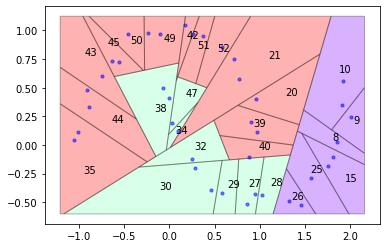

In [15]:
number_of_clusters = 3
Plot.plot2D_merging(data,part,list_p,number_of_clusters)

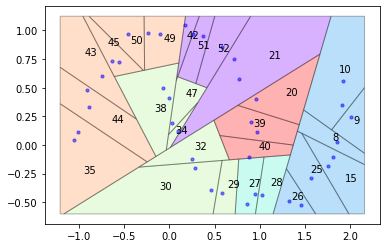

In [16]:
number_of_clusters = 6
Plot.plot2D_merging(data,part,list_p,number_of_clusters)

In [ ]:
import sys
print(sys.getsizeof(df))

In [16]:
import time
start = time.perf_counter()
classified_data = class_assignment(list_m_leaf)
end = time.perf_counter()
print(end - start)

0.1340065999999922
